<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%205/Homework_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical

import keras.backend as K

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_cat = to_categorical(Y_train)
y_test_cat = to_categorical(Y_test)
X_train.shape, y_test_cat.shape


170500096/170498071 [==============================] - 51s 0us/step


((50000, 32, 32, 3), (10000, 10))

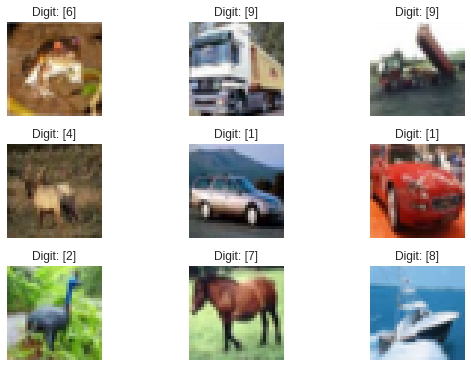

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
import math

In [0]:
K.clear_session()

model = Sequential()

# Add a convolution layer
model.add(Conv2D(40, (3, 3), activation='tanh', padding='same',
                 kernel_regularizer=regularizers.l2(0.001), 
                 input_shape=(32, 32, 3)))
# Apply Batch Normalization
model.add(BatchNormalization())
# Add a convolution layer
model.add(Conv2D(40, (3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.001)))
# Apply Batch Normalization
model.add(BatchNormalization())
# Max Pool it
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropout
model.add(Dropout(0.2))

# Add a convolution layer
model.add(Conv2D(80, (3, 3), activation='tanh', padding='same',
                 kernel_regularizer=regularizers.l2(0.001)))
# Apply Batch Normalization
model.add(BatchNormalization())
# Add a convolution layer
model.add(Conv2D(80, (3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.001)))
# Apply Batch Normalization
model.add(BatchNormalization())
# Max Pool it
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropout
model.add(Dropout(0.3))

# Add a convolution layer
model.add(Conv2D(160, (3, 3), activation='tanh', padding='same',
                kernel_regularizer=regularizers.l2(0.001)))
# Apply Batch Normalization
model.add(BatchNormalization())
# Add a convolution layer
model.add(Conv2D(160, (3, 3), activation='relu', padding='same',
                kernel_regularizer=regularizers.l2(0.001)))
# Apply Batch Normalization
model.add(BatchNormalization())
# Max Pool it
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropout
model.add(Dropout(0.4))

# Flatten before giving to dense layer
model.add(Flatten())
model.add(Dropout(0.4))
# Add softmax output
model.add(Dense(10, activation='softmax', 
                kernel_regularizer=regularizers.l2(0.001)))

# Early stopping callback
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
# Create callback list
callbacks_list = [es]

start_learning_rate = 10e-5
end_learning_rate = 10e-6
epochs = 300
decay_rate = (start_learning_rate - end_learning_rate) / epochs

optimizer = Adam(lr=start_learning_rate, decay=decay_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

h = model.fit(X_train, y_train_cat, batch_size=128,
              callbacks=callbacks_list,epochs=epochs, 
              verbose=1, validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 40)        1120      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 40)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 40)        14440     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 40)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 40)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 40)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 80)        28880     
__________

In [0]:
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.plot(h.history['acc'], label='Training Accuracy')
plt.legend()